In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("/home/sid/Downloads/trainForest.csv")

In [3]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
## Since first column is useless
data=data.iloc[:,1:]

In [5]:
data.shape

(15120, 55)

In [6]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [7]:
print(data.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [8]:
##Wilderness_Area and Soil_Type are on hot encoded; hence they should be converted.
##Features Soil_Type7 and Soil_Type15 should be removed as they are constant for all training examples(i.e. 0).

In [9]:
data.isnull().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

In [10]:
##No missing values.

In [11]:
#Skewness
#values close to zero depict less  skew
data.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [12]:
## Several features in Soil_type have quite large skews hence they might be corrected if required in order to assume Gaussian Distributions.

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64


Text(0,0.5,u'Count')

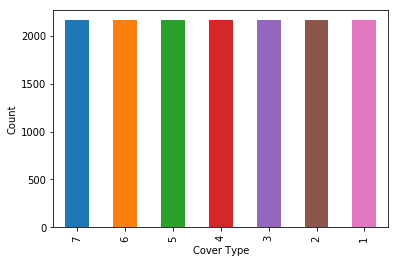

In [13]:
print data.groupby('Cover_Type').size()

##Visualising it.

plt.figure()
pd.Series(data['Cover_Type']).value_counts().plot(kind = 'bar')
plt.xlabel("Cover Type")
plt.ylabel("Count")

In [14]:
## Hence the dataset is perfectly balanced.

In [15]:
size=10
d=pd.concat([data.iloc[:,:size] , data.iloc[:,54]],axis=1)
d.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [16]:
## This also has very high cardinality (i.e. high number of unique values) especially for the column Soil_type.

In [17]:
cols=d.columns

In [18]:
correlation=d.corr()

In [19]:
threshold=0.5

## Selecting only highly correlated features.

In [20]:
correlated_features=[]

for i in range(0,11):
    for j in range(i+1,11):
        if (correlation.iloc[i,j]>=threshold and correlation.iloc[i,j]<1) or (correlation.iloc[i,j]<0 and correlation.iloc[i,j]<=-threshold):
            correlated_features.append([correlation.iloc[i,j],i,j])
            
            
         

In [21]:
sorted_list=sorted(correlated_features,key=lambda x: -abs(x[0]))

In [22]:
for ro,i,j in sorted_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],ro))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


In [23]:
## Some good correlation is there between many features.
## Hence,may want to reduce the feature set using transformtions such as PCA,beacuse if features are highly correlated they are less useful since they don not conain any extra information.


In [24]:
## Data Visualisation

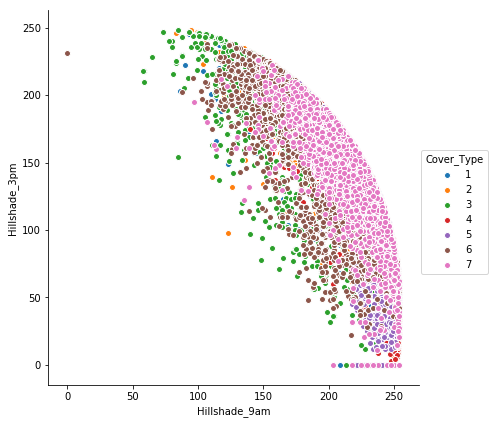

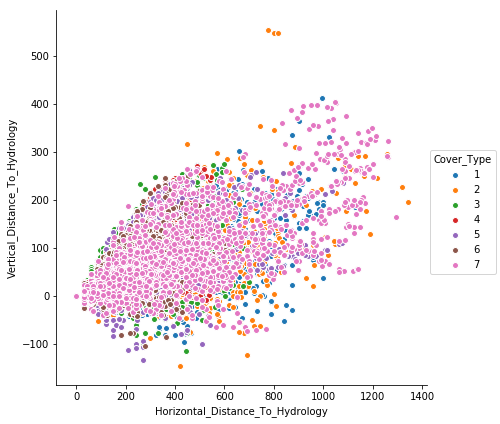

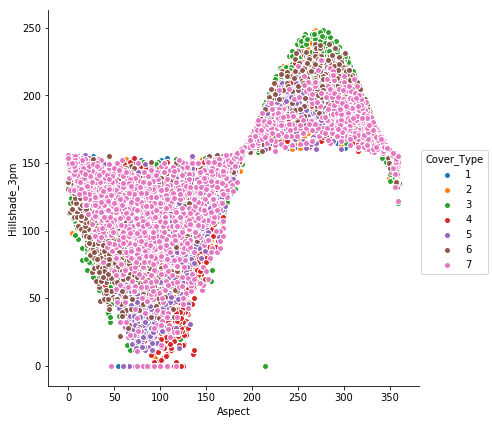

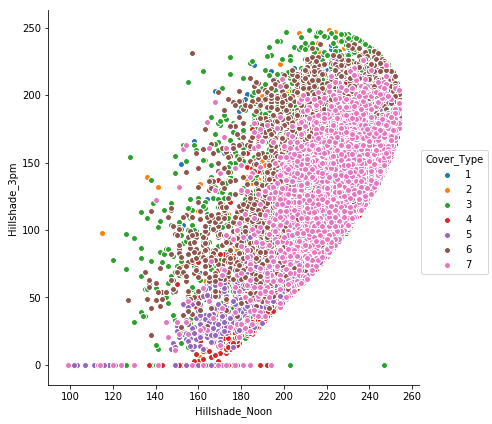

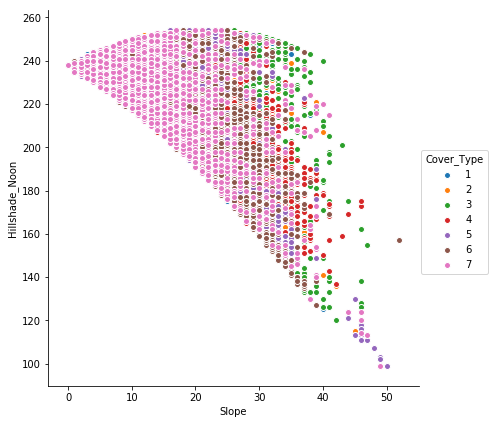

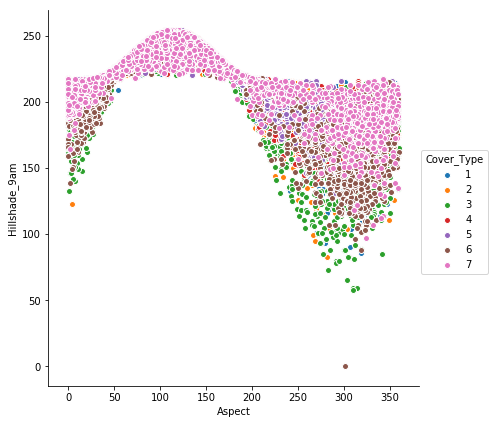

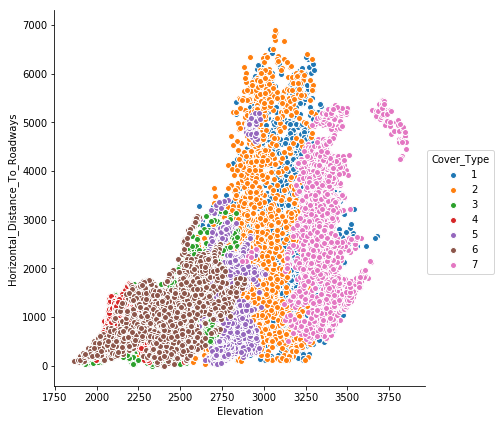

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of only the highly correlated pairs
for v,i,j in sorted_list:
    sns.pairplot(data, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [26]:
all_cols=data.columns

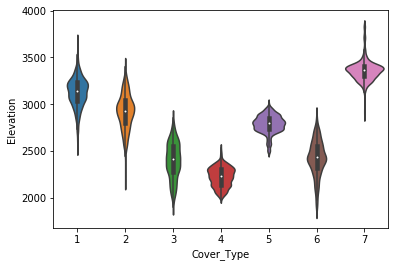

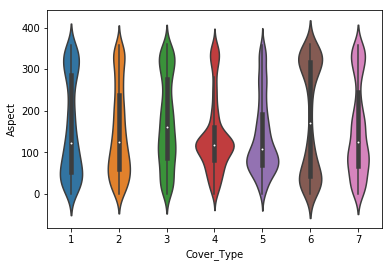

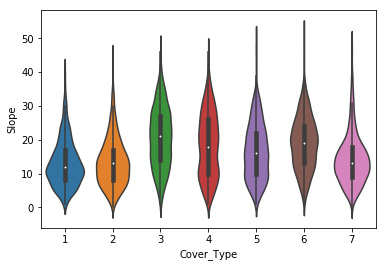

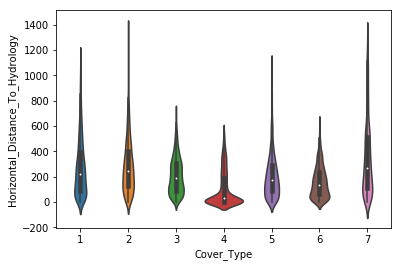

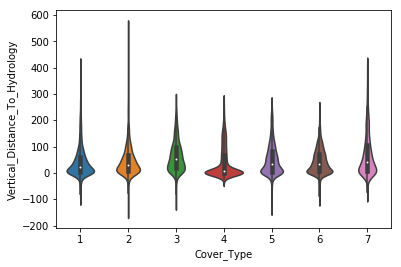

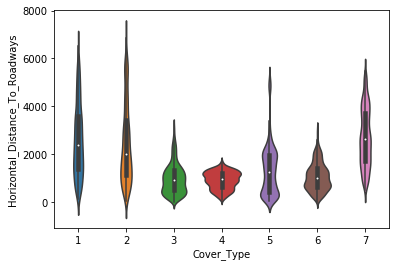

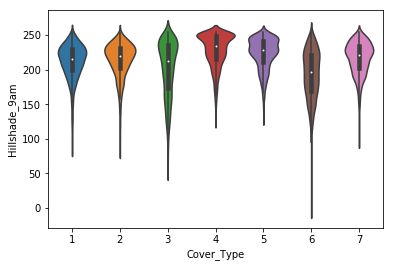

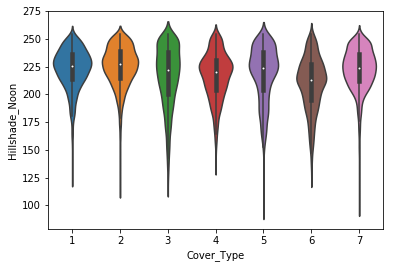

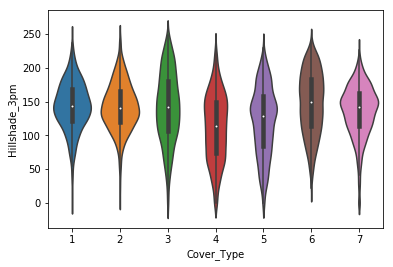

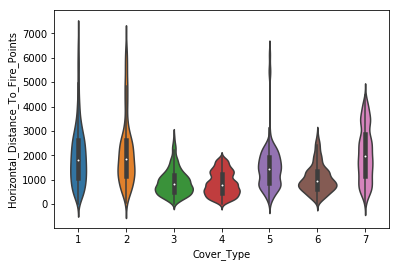

In [27]:
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=data,x=x,y=y[i])  
    plt.show()

In [28]:
removal = []

#Add constant columns as they don't help in prediction process
for c in data.columns:
    if data[c].std() == 0:
        removal.append(c)

#drop the columns        
data.drop(removal,axis=1,inplace=True)

print(removal)

['Soil_Type7', 'Soil_Type15']


In [29]:
data.isnull().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type8                            False
Soil_Type9                            False
Soil_Type10                     

In [30]:
# No missing values.

In [31]:
# Implementing XGBoost

In [32]:
dependent_variable="Cover_Type"
independent_variale=[x for x in data.columns if x not in [dependent_variable]]

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
categorical_variable=data.dtypes[data.dtypes=="object"].index.values


In [36]:
for var in categorical_variable:
    data[var]=le.fit_transform(data[var])

In [37]:
from xgboost import XGBClassifier

In [38]:
model=XGBClassifier()

In [39]:
model.fit(data[independent_variale], data[dependent_variable])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
y_pred = model.predict(data[independent_variale])

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
from sklearn.metrics import accuracy_score

In [43]:
predictionss = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data[dependent_variable], predictionss)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.42%
